In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tweets=pd.read_csv("/content/drive/MyDrive/dataset_train_v1_english.tsv",sep='\t')
tweets

,topic_id,tweet_id,tweet_url,tweet_text,claim,check_worthiness
0,covid-19,1234964653014384644,https://twitter.com/EricTrump/status/123496465...,Since this will never get reported by the medi...,1,1
1,covid-19,1234869939720216578,https://twitter.com/RealJamesWoods/status/1234...,"Thanks, #MichaelBloomberg. Here’s a handy litt...",0,0
2,covid-19,1234873136304267267,https://twitter.com/hayxsmith/status/123487313...,"Folks, when you say ""The corona virus isn't a ...",0,0
3,covid-19,1235071285027147776,https://twitter.com/ipspankajnain/status/12350...,Just 1 case of Corona Virus in India and peop...,1,0
4,covid-19,1234911110861594624,https://twitter.com/PressSec/status/1234911110...,President @realDonaldTrump made a commitment...,1,1
...,...,...,...,...,...,...
817,covid-19,1235914080931766274,https://twitter.com/DrZweliMkhize/status/12359...,Stop spreading fake news #Coronavirus https://...,0,0
818,covid-19,1235770706765451264,https://twitter.com/globaltimesnews/status/123...,It's fake! It's fake!' shout residents of a co...,1,1
819,covid-19,1235973416995315712,https://twitter.com/wef/status/123597341699531...,Be Smart about #COVID19: 1️⃣ follow accurate p...,0,0
820,covid-19,1235675024738185239,https://twitter.com/999saudsalman/status/12356...,"On the left: @A_AlAthbah, a Qatari puppet, att...",1,1


PRE-PROCESSING TWEETS

In [ ]:
tweets['tweet_text'] = tweets.tweet_text.str.lower()

In [ ]:
import regex as re

In [ ]:
#removing URL
tweets.tweet_text =tweets.tweet_text.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
tweets.tweet_text.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

0      since this will never get reported by the medi...
1      thanks, #michaelbloomberg. here’s a handy litt...
2      folks, when you say "the corona virus isn't a ...
3      just 1 case of corona virus in india and  peop...
4      president  @realdonaldtrump  made a commitment...
                             ...                        
817               stop spreading fake news #coronavirus 
818    it's fake! it's fake!' shout residents of a co...
819    be smart about #covid19: 1️⃣ follow accurate p...
820    on the left: @a_alathbah, a qatari puppet, att...
821    could this be reason why #coronavirus has spre...
Name: tweet_text, Length: 822, dtype: object

In [ ]:
#Placeholders Some text cleaning was already done on the dataset which replaced some links with {link} and all the videos with [video]. They don’t seem to be of any value when doing sentiment analysis so I will remove them with regex
tweets.tweet_text = tweets.tweet_text.apply(lambda x: re.sub(r'{link}', '', x))
tweets.tweet_text = tweets.tweet_text.apply(lambda x: re.sub(r"\[video\]", '', x))

In [ ]:
#HTML reference characters I don’t think these are of any value to the analysis so they also should be removed
tweets.tweet_text = tweets.tweet_text.apply(lambda x: re.sub(r'&[a-z]+;', '', x))

In [ ]:
#removing punctuations
tweets.tweet_text = tweets.tweet_text.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))

In [ ]:
#Twitter handles Prior the text pre-processing stage, I changed all the twitter handles to @mention in acknowledgement of the need for protecting people’s privacy
tweets.tweet_text = tweets.tweet_text.apply(lambda x: re.sub(r'@mention', '', x))

In [ ]:
#Tokenize the text
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
tweets['tokens'] = tweets['tweet_text'].apply(tknzr.tokenize)

In [ ]:
tweets['tokens'][8]

['prime',
 'minister',
 'of',
 'israel',
 'benjamin',
 'netanyahu',
 'netanyahu',
 'encourages',
 'israelis',
 'to',
 'adopt',
 'the',
 'indian',
 'way',
 'of',
 'greeting',
 '#namaste',
 'at',
 'a',
 'press',
 'conference',
 'to',
 'mitigate',
 'the',
 'spread',
 'of',
 '#coronavirus']

In [ ]:
import re 
combined = []
for tweet in tweets['tokens']: 
    combined.append(" ".join(tweet))
for i in range(len(combined)):
    combined[i] = re.sub(r'[^\w\s]','',combined[i]) #using regex module re to remove punctuation from the text
    combined[i] = re.sub(r'[0-9]+','',combined[i]) #using regex module re to remove digits from the text

In [ ]:
combined[:5]

['since this will never get reported by the media i wanted to share a copy of this check realdonaldtrump is once again donating his salary back to the united states government this quarter it will be donated to hhsgov to confront contain and combat coronavirus flag of united statesflag of united states',
 'thanks michaelbloomberg heres a handy little  unintentional  demo on the way to spread coronavirus by the most clueless person in america  touch community food as much as you can with your salivasoaked fingers minimikebloomberg droolingbloomberg',
 'folks when you say the corona virus isnt a big deal it only kills the disabled elderly chornicallyill and immunocompromised the implication is that those people are expendable please be more careful',
 'just case of corona virus in india and people are crazy for masks daily people die in road crashes still no craze for helmetsthinking face safetysaves be it virus or road crashes',
 'president realdonaldtrump made a commitment to donate hi

PRE-PROCESSING THE CLAIM WORTHY TWEETS

In [ ]:
worthy_tweets=[]
for i in range(len(tweets['topic_id'])):
  if tweets['claim'][i]== 1 and tweets['check_worthiness'][i]==1:
    worthy_tweets.append(tweets['tweet_text'][i])


In [ ]:
claim_worthy_tweets=pd.DataFrame(worthy_tweets,columns=['Claim_Worthy_Tweets'])
claim_worthy_tweets

,Claim_Worthy_Tweets
0,since this will never get reported by the medi...
1,president realdonaldtrump made a commitment ...
2,dear realdonaldtrump : you knew about #covid ...
3,just spoke with er doc who say he's seeing cas...
4,#exo members #chanyeol #lay #suho and #kai hav...
...,...
285,#nytimes this is fake news this video belongs...
286,#chinas communist party is encouraging conspir...
287,it's fake it's fake' shout residents of a comm...
288,on the left: aalathbah a qatari puppet attacks...


In [ ]:
claim_worthy_tweets['Claim_Worthy_Tweets'] = claim_worthy_tweets.Claim_Worthy_Tweets.str.lower()

In [ ]:
import regex as re

In [ ]:
#removing URL
claim_worthy_tweets.Claim_Worthy_Tweets =claim_worthy_tweets.Claim_Worthy_Tweets.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
claim_worthy_tweets.Claim_Worthy_Tweets.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

0      since this will never get reported by the medi...
1      president  realdonaldtrump  made a commitment ...
2      dear  realdonaldtrump : you knew about #covid ...
3      just spoke with er doc who say he's seeing cas...
4      #exo members #chanyeol #lay #suho and #kai hav...
                             ...                        
285    #nytimes this is fake news  this video belongs...
286    #chinas communist party is encouraging conspir...
287    it's fake it's fake' shout residents of a comm...
288    on the left: aalathbah a qatari puppet attacks...
289    could this be reason why #coronavirus has spre...
Name: Claim_Worthy_Tweets, Length: 290, dtype: object

In [ ]:
#Placeholders Some text cleaning was already done on the dataset which replaced some links with {link} and all the videos with [video]. They don’t seem to be of any value when doing sentiment analysis so I will remove them with regex
claim_worthy_tweets.Claim_Worthy_Tweets = claim_worthy_tweets.Claim_Worthy_Tweets.apply(lambda x: re.sub(r'{link}', '', x))
claim_worthy_tweets.Claim_Worthy_Tweets = claim_worthy_tweets.Claim_Worthy_Tweets.apply(lambda x: re.sub(r"\[video\]", '', x))

In [ ]:
#HTML reference characters I don’t think these are of any value to the analysis so they also should be removed
claim_worthy_tweets.Claim_Worthy_Tweets = claim_worthy_tweets.Claim_Worthy_Tweets.apply(lambda x: re.sub(r'&[a-z]+;', '', x))

In [ ]:
#removing punctuations
claim_worthy_tweets.Claim_Worthy_Tweets = claim_worthy_tweets.Claim_Worthy_Tweets.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))

In [ ]:
#Twitter handles Prior the text pre-processing stage, I changed all the twitter handles to @mention in acknowledgement of the need for protecting people’s privacy
claim_worthy_tweets.Claim_Worthy_Tweets = claim_worthy_tweets.Claim_Worthy_Tweets.apply(lambda x: re.sub(r'@mention', '', x))

In [ ]:
#Tokenize the text
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
claim_worthy_tweets['tokens'] = claim_worthy_tweets['Claim_Worthy_Tweets'].apply(tknzr.tokenize)

In [ ]:
claim_worthy_tweets['tokens'][8]

['to',
 'date',
 'the',
 'president',
 'has',
 'spent',
 'million',
 'of',
 'taxpayer',
 'money',
 'to',
 'play',
 'golf',
 'that',
 'is',
 'years',
 'worth',
 'of',
 'presidential',
 'salary']

In [ ]:
import re 
combined_worthy_tweets = []
for tweet in claim_worthy_tweets['tokens']: 
    combined_worthy_tweets.append(" ".join(tweet))
for i in range(len(combined_worthy_tweets)):
    combined_worthy_tweets[i] = re.sub(r'[^\w\s]','',combined_worthy_tweets[i]) #using regex module re to remove punctuation from the text
    combined_worthy_tweets[i] = re.sub(r'[0-9]+','',combined_worthy_tweets[i]) #using regex module re to remove digits from the text

In [ ]:
combined_worthy_tweets[:5]

['since this will never get reported by the media i wanted to share a copy of this check realdonaldtrump is once again donating his salary back to the united states government this quarter it will be donated to hhsgov to confront contain and combat coronavirus flag of united statesflag of united states',
 'president realdonaldtrump made a commitment to donate his salary while in office honoring that promise and to further protect the american people he is donating his q salary to hhsgov to support the efforts being undertaken to confront contain and combat coronavirus',
 'dear realdonaldtrump  you knew about covid in january it is march and your administration still does not have enough test kits that is unconscionable and a dereliction of duty stop minimizing the coronaoutbreak and start leading lives are at stake link',
 'just spoke with er doc who say hes seeing cases hes sure are coronavirus negative for flu recent travel work in airports not allowed to test patients return to work

In [ ]:
cv = CountVectorizer()
word_count_vector = cv.fit_transform(combined)
tf = pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names())
print(tf)

     aage  aalathbah  aaron  abandoned  abba  abbott  ability  able  \
0       0          0      0          0     0       0        0     0   
1       0          0      0          0     0       0        0     0   
2       0          0      0          0     0       0        0     0   
3       0          0      0          0     0       0        0     0   
4       0          0      0          0     0       0        0     0   
..    ...        ...    ...        ...   ...     ...      ...   ...   
817     0          0      0          0     0       0        0     0   
818     0          0      0          0     0       0        0     0   
819     0          0      0          0     0       0        0     0   
820     0          1      0          0     0       0        0     0   
821     0          0      0          0     0       0        0     0   

     abortions  about  ...  youve  yr  yrold  yt  yup  yuzu  zero  \
0            0      0  ...      0   0      0   0    0     0     0   
1        

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
word_count_vector1 = cv.fit_transform(combined)
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(word_count_vector1)
idf = pd.DataFrame({'feature_name':cv.get_feature_names(), 'idf_weights':tfidf_transformer.idf_})
print(idf)

     feature_name  idf_weights
0            aage     7.019809
1       aalathbah     7.019809
2           aaron     7.019809
3       abandoned     6.614344
4            abba     7.019809
...           ...          ...
4925         yuzu     7.019809
4926         zero     6.614344
4927  zhangyixing     7.019809
4928         zika     6.614344
4929       zombie     7.019809

[4930 rows x 2 columns]


In [ ]:
tf_idf = pd.DataFrame(X.toarray() ,columns=cv.get_feature_names())
x = tf_idf.to_numpy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


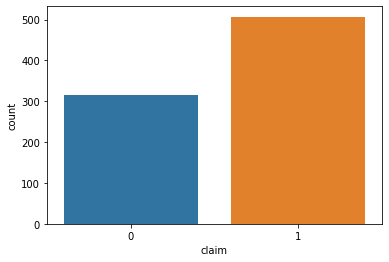

In [ ]:
#to check whether our dataset is imbalanced or balanced
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.countplot(tweets['claim'])
plt.show()
warnings.filterwarnings('ignore')

In [ ]:
tweets['claim'].value_counts() 

1    507
0    315
Name: claim, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X, y = tf_idf.to_numpy(),tweets['check_worthiness'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)

print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Accuracy score (training): 0.716
Accuracy score (validation): 0.636


In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=5, max_depth=8, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[129  46]
 [ 57  40]]
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       175
           1       0.47      0.41      0.44        97

    accuracy                           0.62       272
   macro avg       0.58      0.57      0.58       272
weighted avg       0.61      0.62      0.62       272



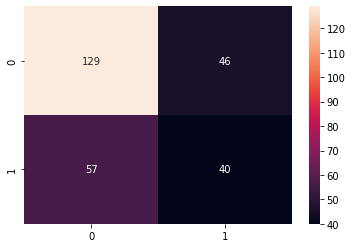

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test, predictions)
sns.heatmap(cm,fmt='g',annot=True)